In [1]:
!nvidia-smi

Fri Feb  7 13:07:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip list | grep torch

torch                              2.5.1+cu124
torchaudio                         2.5.1+cu124
torchsummary                       1.5.1
torchvision                        0.20.1+cu124


In [4]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)


In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

workspace = rf.workspace("liangdianzhong")
project = rf.workspace("vision-iudig").project("ppe-dataset-for-workplace-safety-62mmn-a016k")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE-Dataset-for-Workplace-Safety-1 in yolov8:: 100%|██████████| 7680/7680 [00:01<00:00, 4769.44it/s]


In [6]:
!yolo task= detect mode=predict model=yolov8l.pt conf= 0.25, source= 'https://ultralytics.com/images/bus.jpg'

WARNING ⚠️ argument 'conf=0.25,' does not require trailing comma ',', updating to 'conf=0.25'.
100% 83.7M/83.7M [00:00<00:00, 124MB/s]
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8l summary (fused): 268 layers, 43,668,288 parameters, 0 gradients, 165.2 GFLOPs

100% 134k/134k [00:00<00:00, 6.26MB/s]
image 1/1 /content/datasets/bus.jpg: 640x480 5 persons, 1 bicycle, 1 bus, 60.5ms
Speed: 15.3ms preprocess, 60.5ms inference, 304.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [7]:
{dataset.location}

{'/content/datasets/PPE-Dataset-for-Workplace-Safety-1'}

In [9]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=20  imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.73 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/datasets/PPE-Dataset-for-Workplace-Safety-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mas

In [10]:
!ls {HOME}/runs/detect/train2/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1738934102.08d21b521c1f.3538.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2100.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch2101.jpg  weights
P_curve.png					    train_batch2102.jpg
PR_curve.png					    train_batch2.jpg


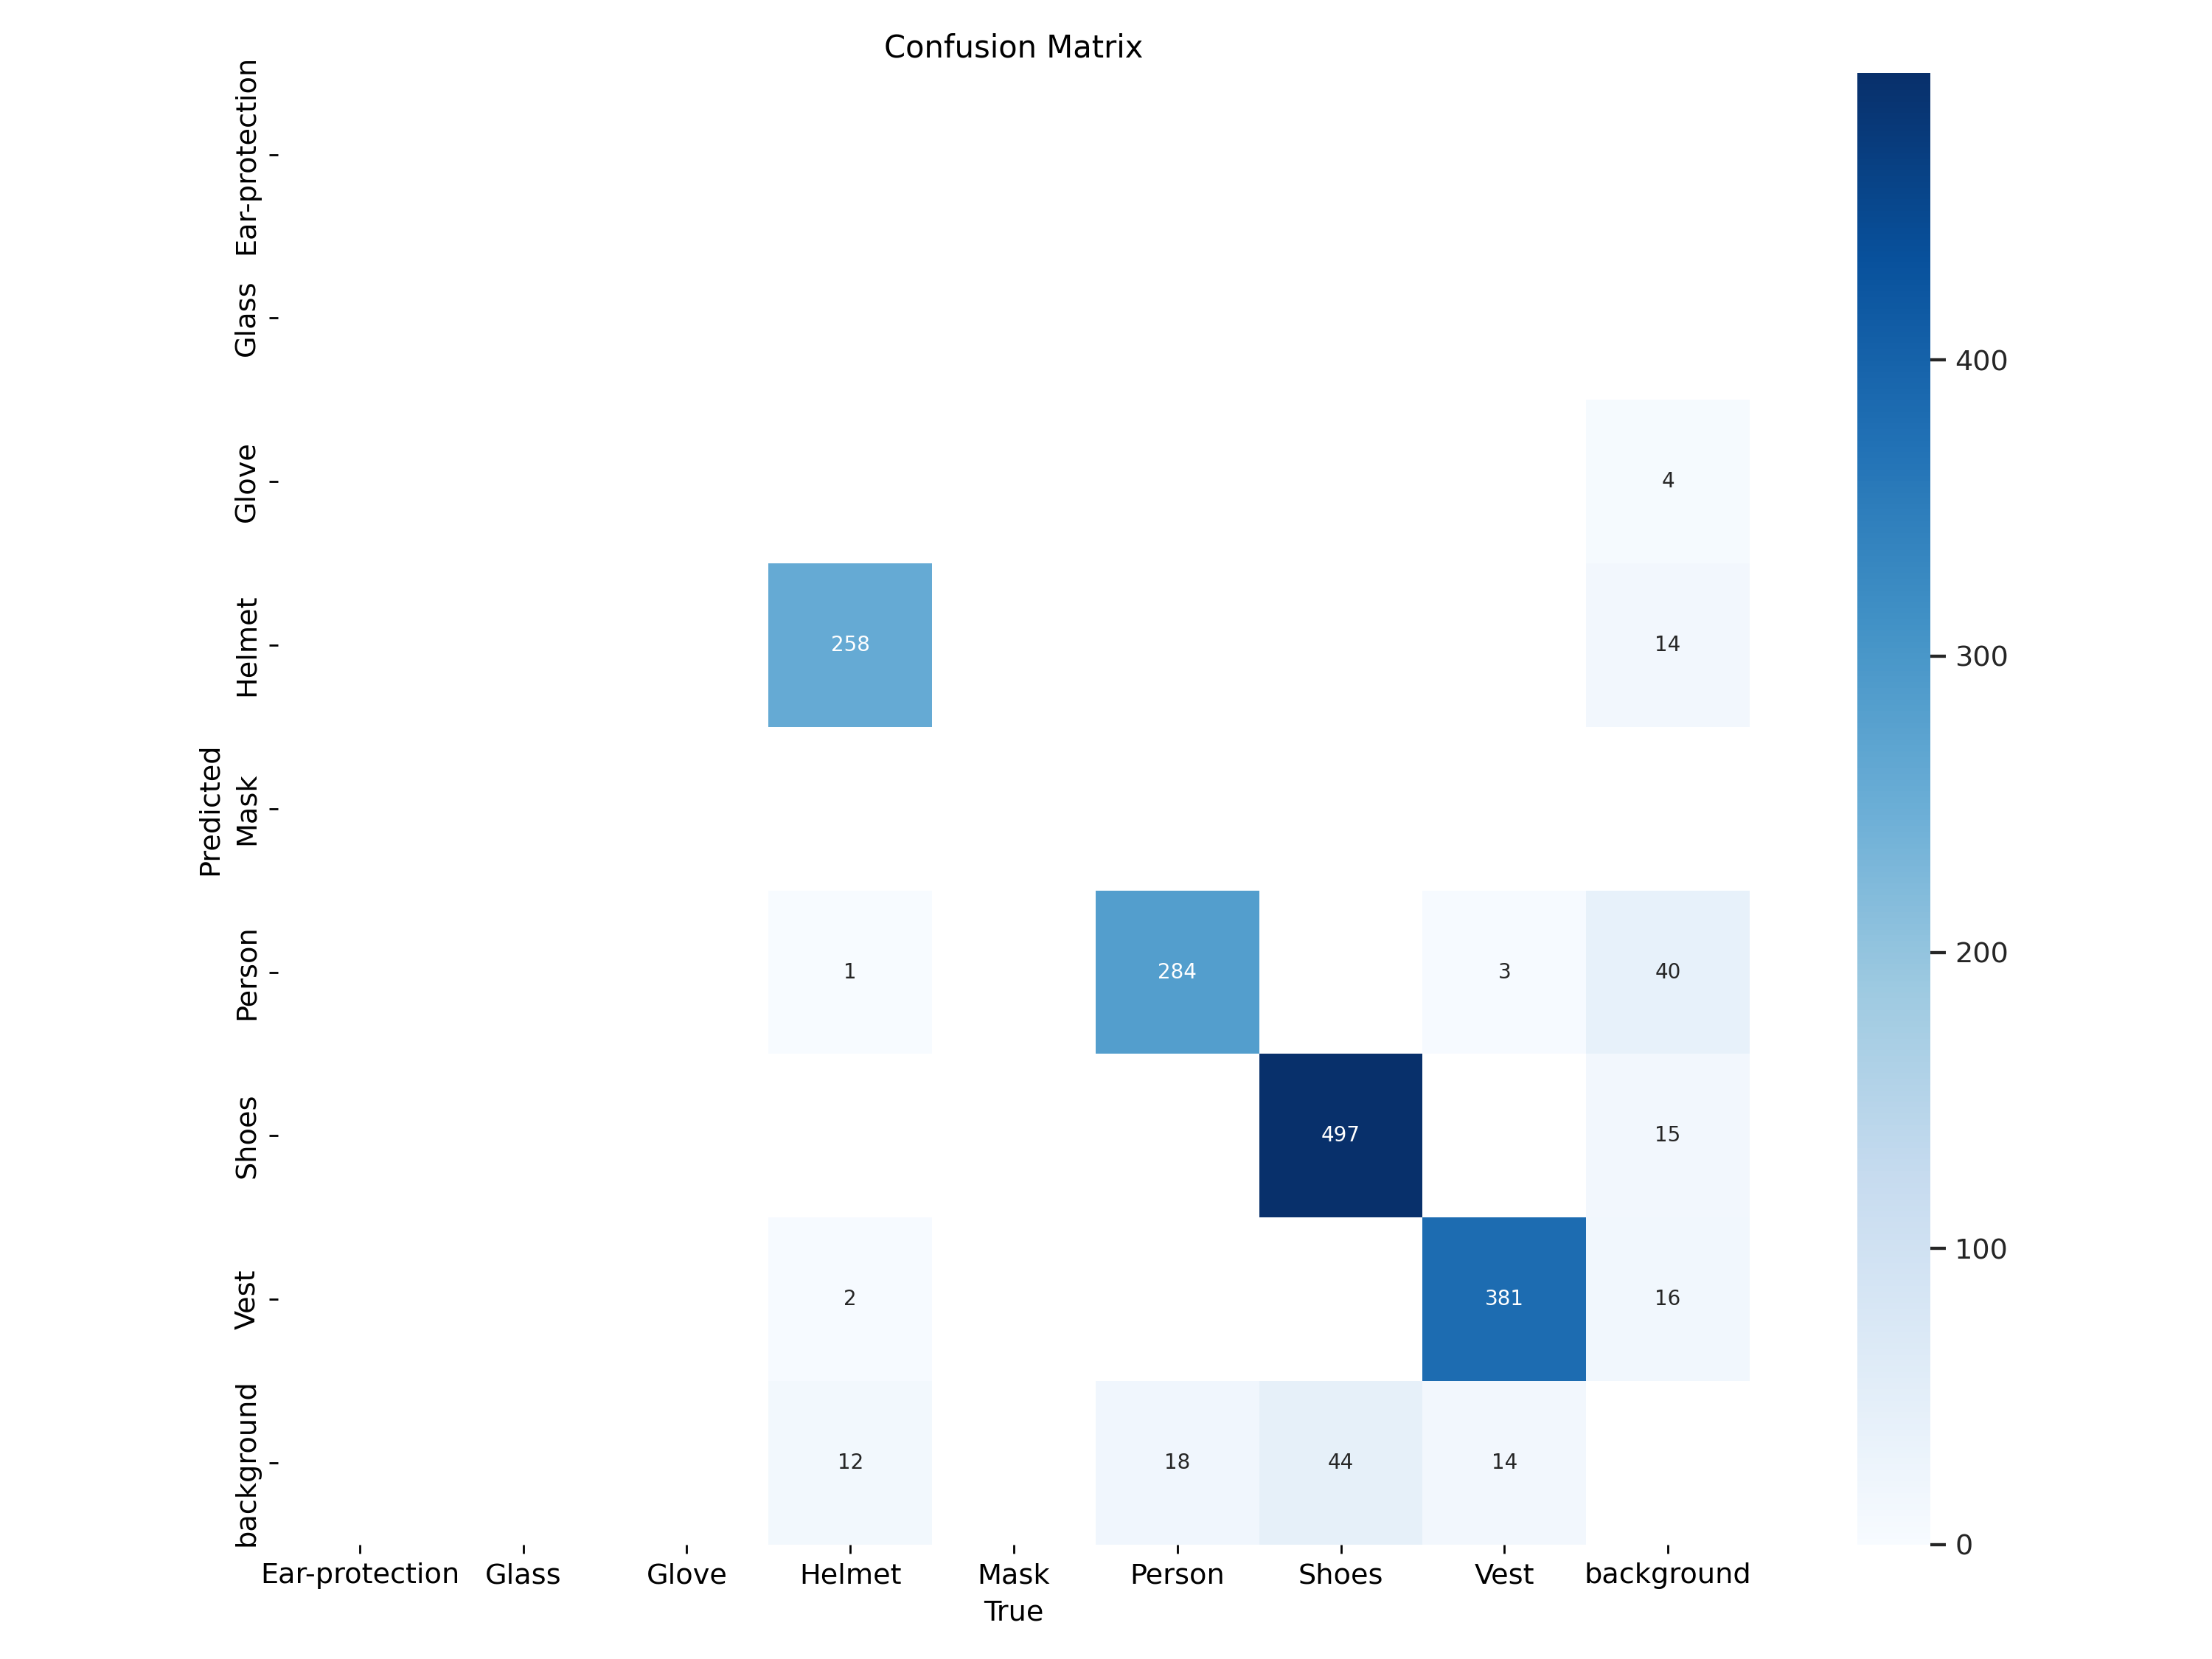

In [11]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

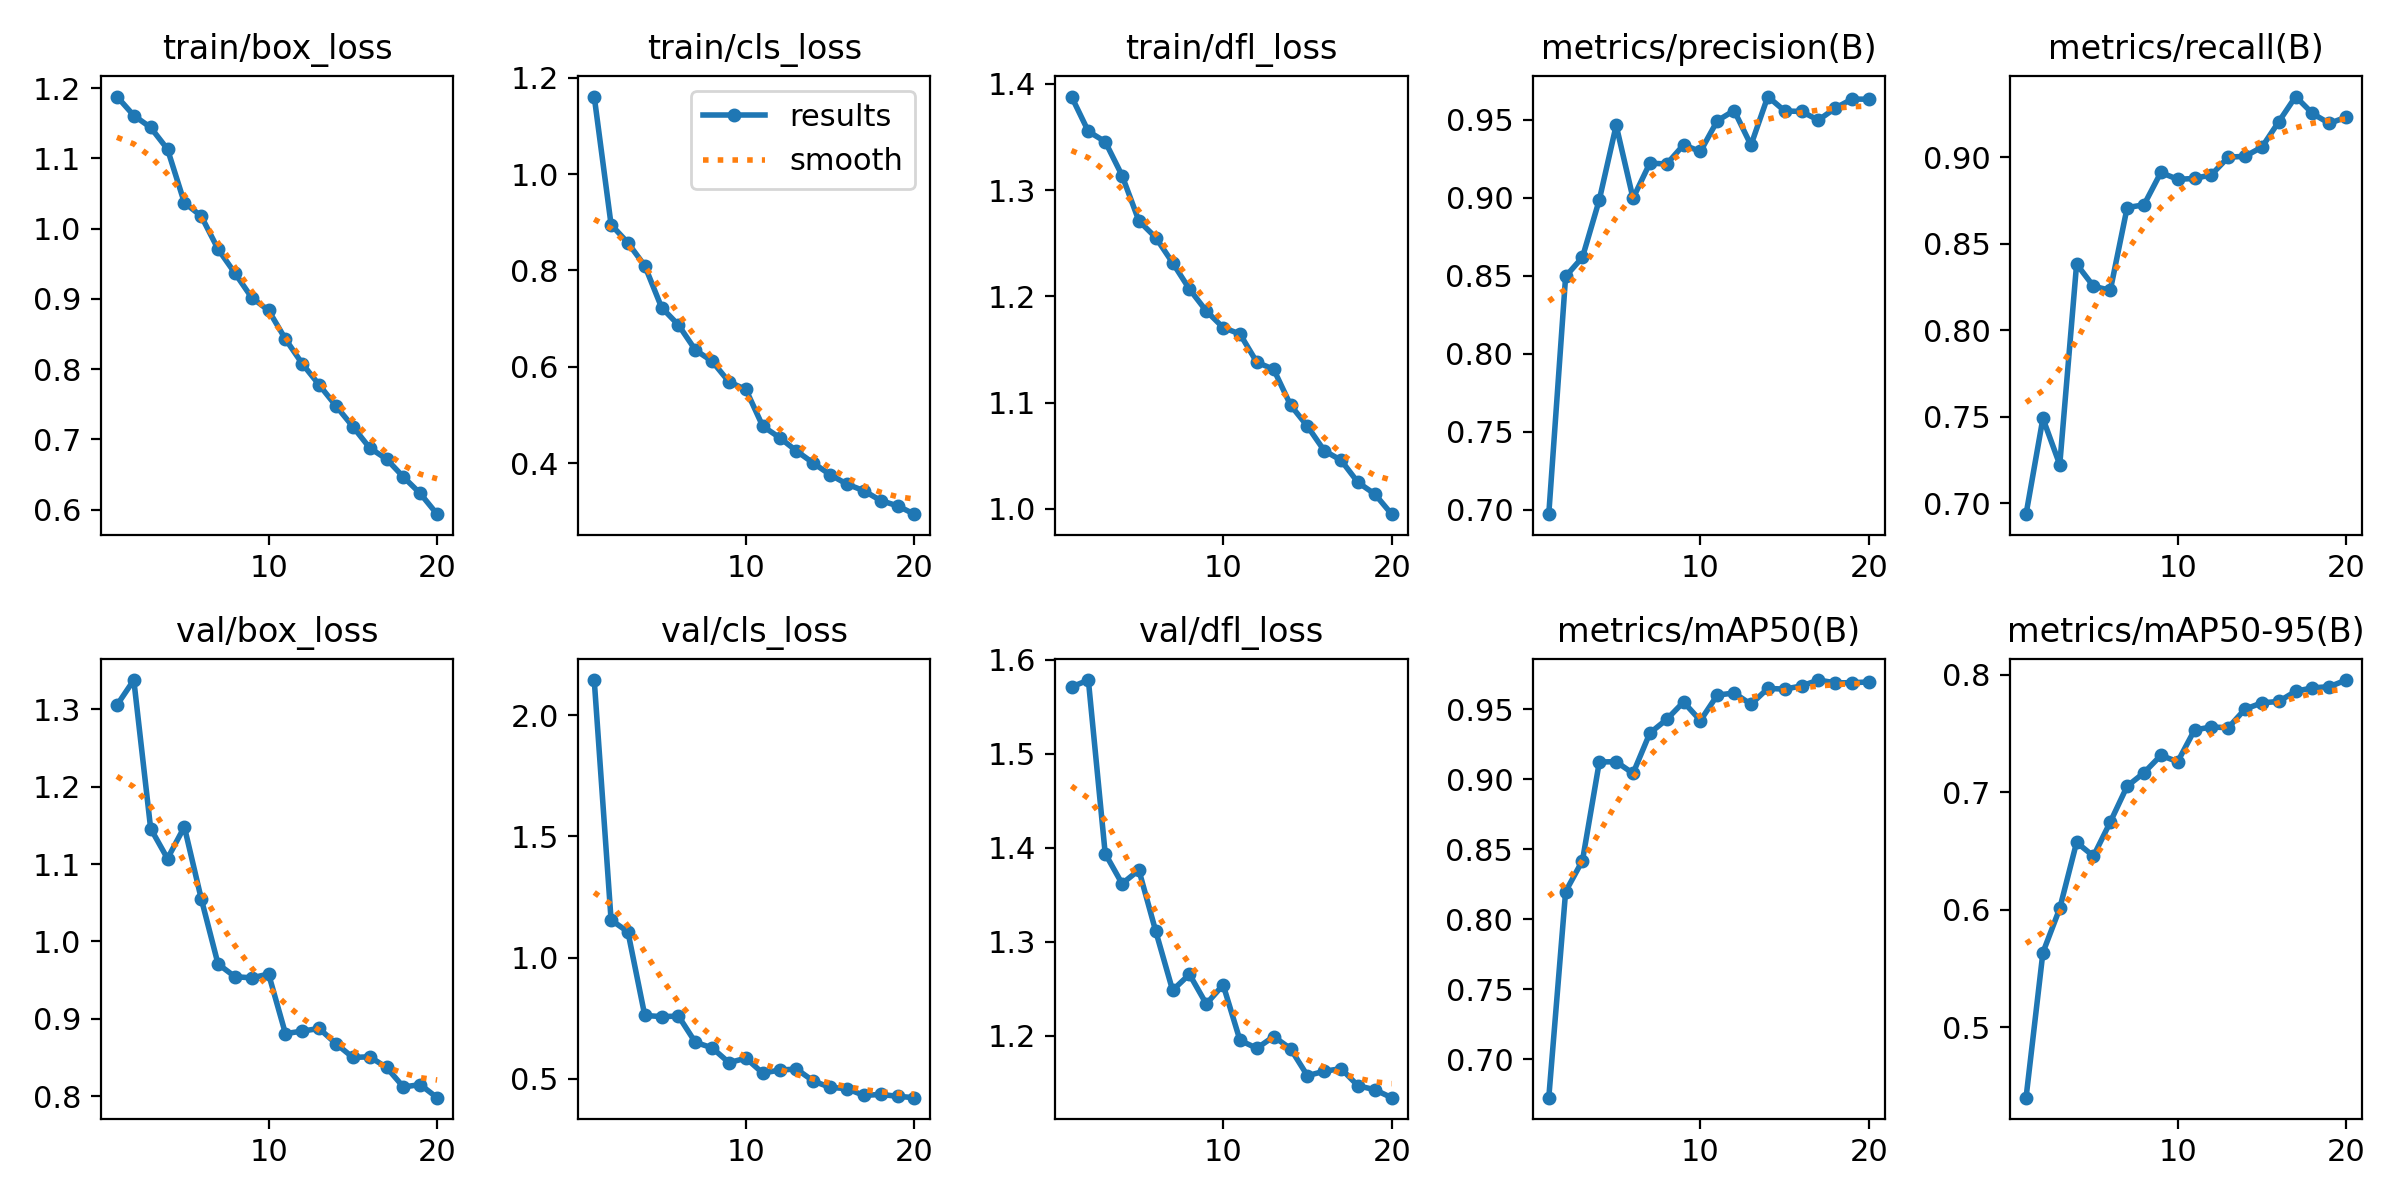

In [12]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

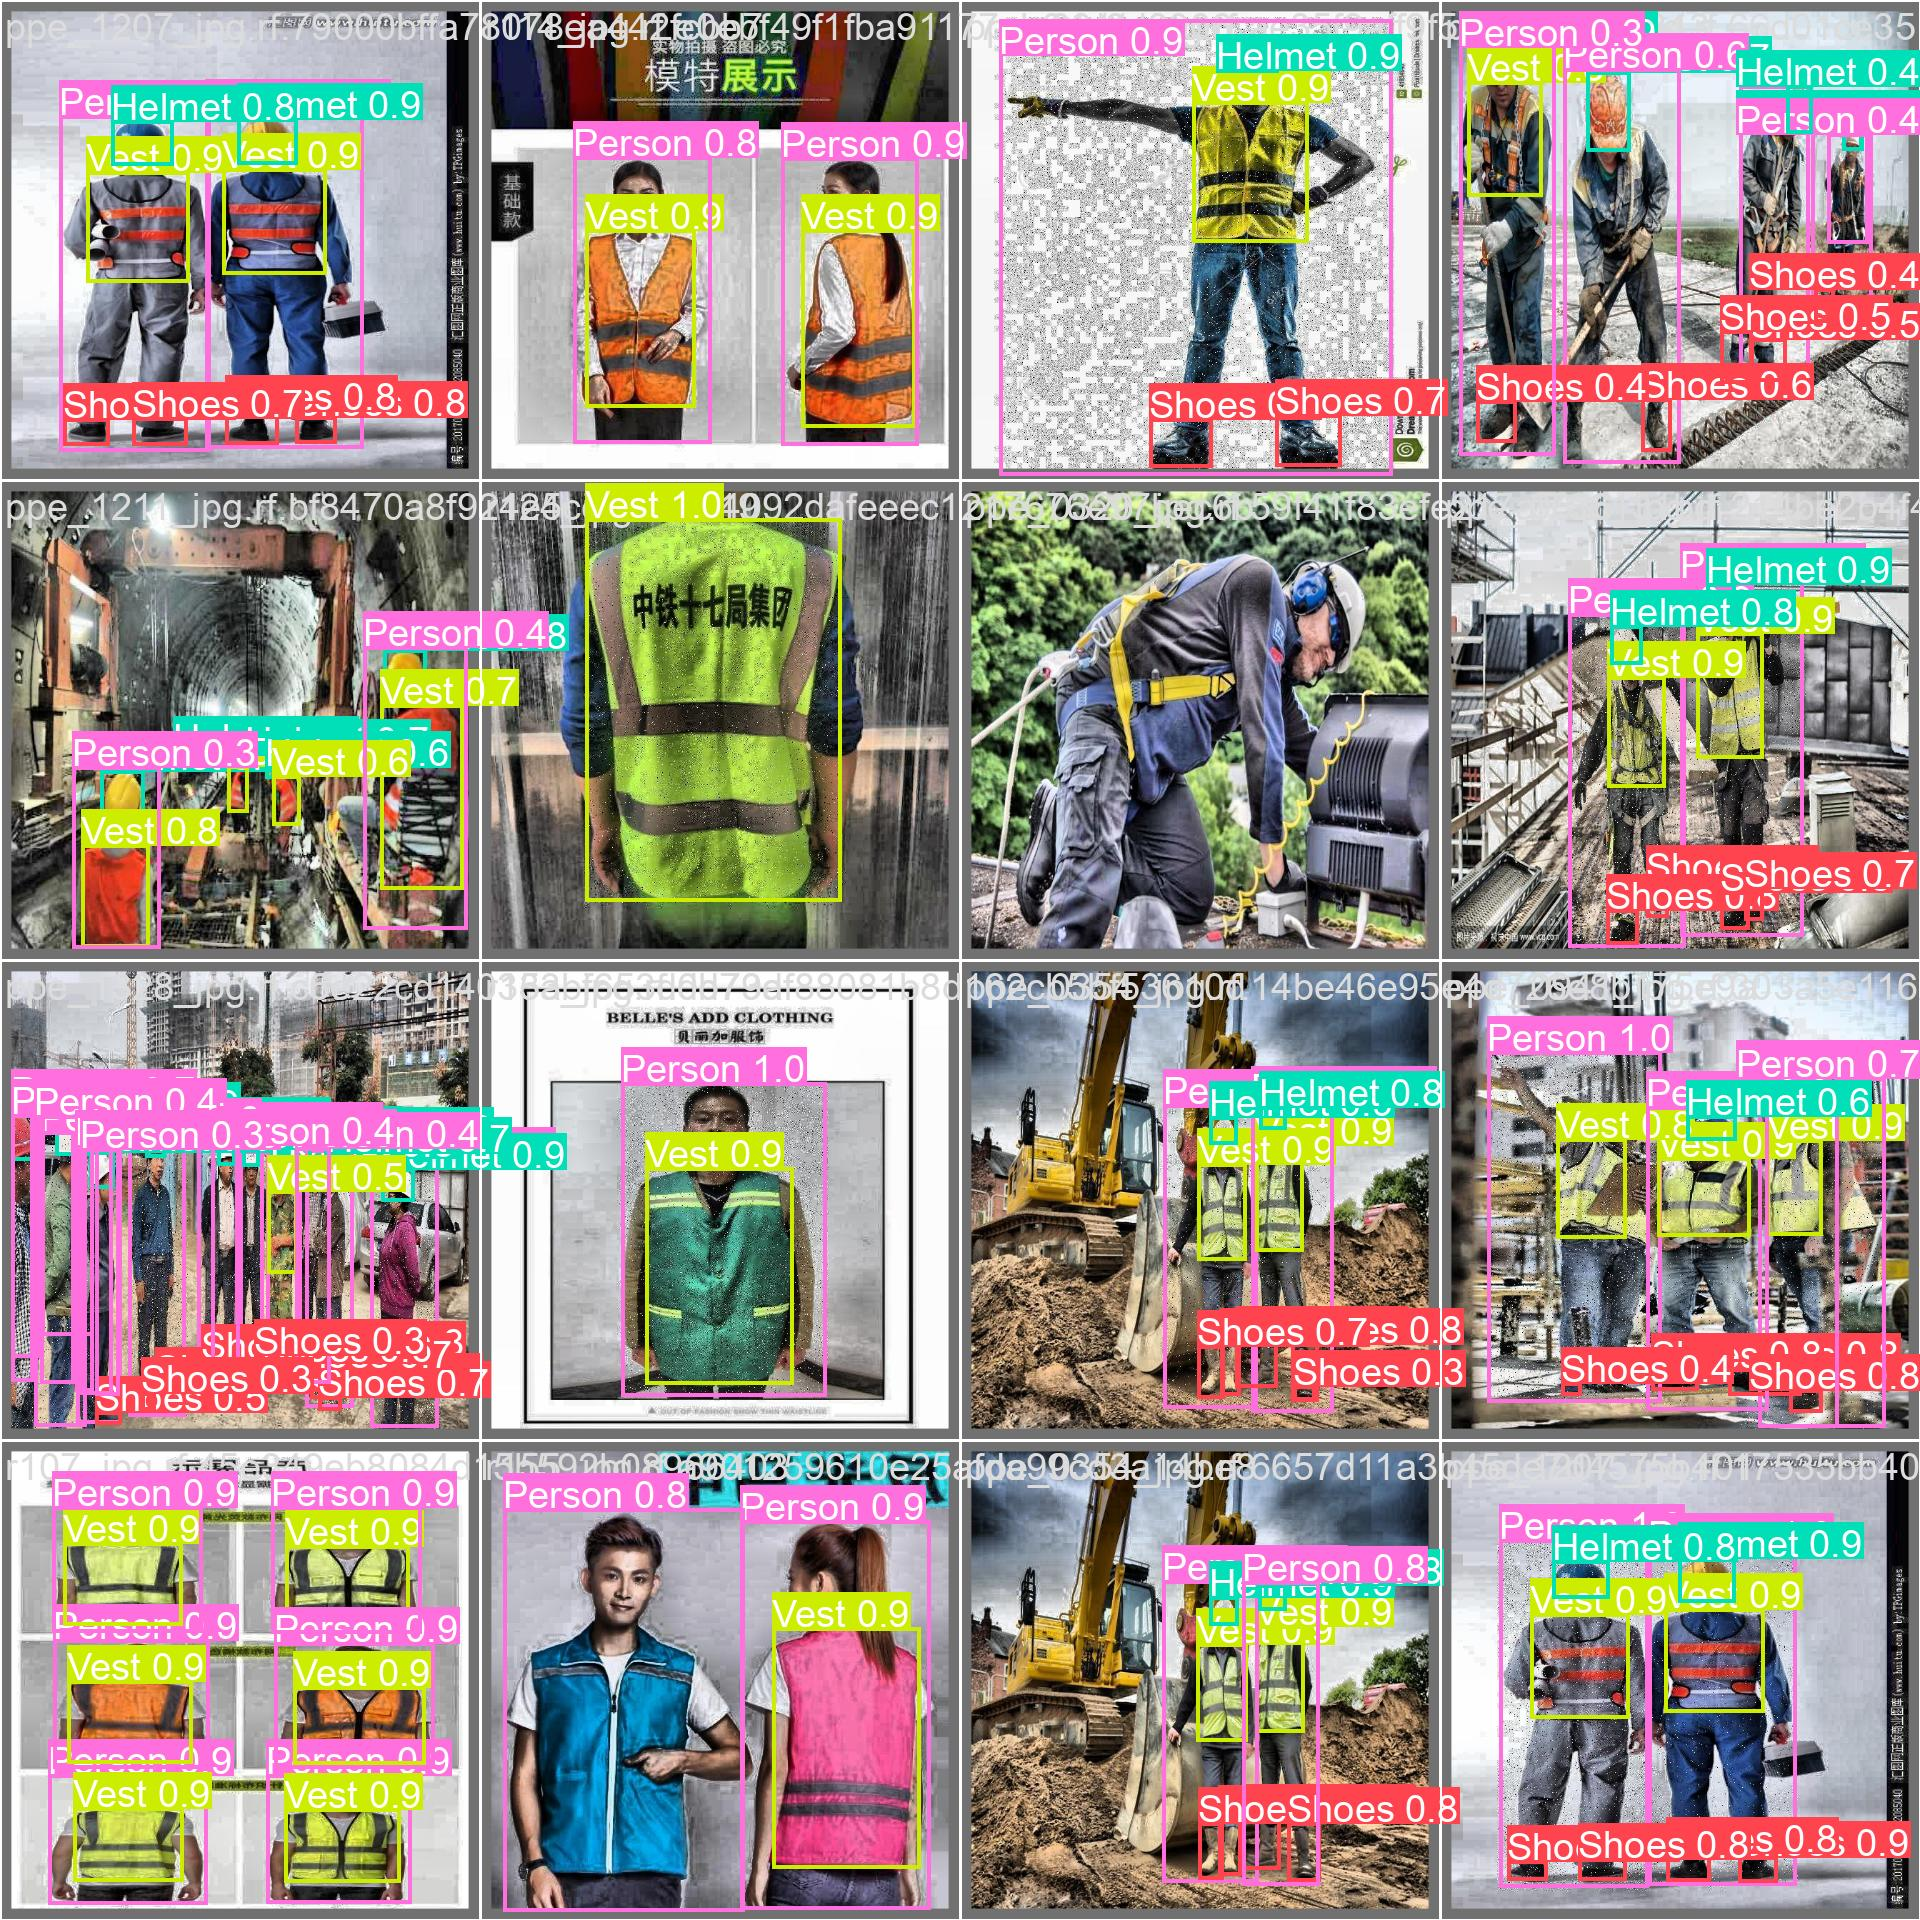

In [13]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [14]:
!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 268 layers, 43,612,776 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/datasets/PPE-Dataset-for-Workplace-Safety-1/valid/labels.cache... 326 images, 0 backgrounds, 0 corrupt: 100% 326/326 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 21/21 [00:13<00:00,  1.54it/s]
                   all        326       1514      0.964      0.923       0.97      0.795
                Helmet        232        273      0.974       0.93       0.96      0.734
                Person        246        302      0.924      0.907      0.966      0.867
                 Shoes        246        541      0.985        0.9       0.97      0.736
                  Vest        307        398      0.974      0.955      0.982      0.844
Speed: 0.7ms preprocess, 35.0ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/d

In [16]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 268 layers, 43,612,776 parameters, 0 gradients, 164.8 GFLOPs

image 1/161 /content/datasets/PPE-Dataset-for-Workplace-Safety-1/test/images/00027_jpg.rf.f324a1f72bbf68b8cf40c3fa9be19cc7.jpg: 640x640 2 Persons, 2 Vests, 62.6ms
image 2/161 /content/datasets/PPE-Dataset-for-Workplace-Safety-1/test/images/00037_jpg.rf.374a0de14b602d3c099c55e84139e8fb.jpg: 640x640 1 Vest, 43.2ms
image 3/161 /content/datasets/PPE-Dataset-for-Workplace-Safety-1/test/images/00048_jpg.rf.3c33f8cacdec4fd2d0ecd05a046266d5.jpg: 640x640 1 Helmet, 2 Vests, 43.1ms
image 4/161 /content/datasets/PPE-Dataset-for-Workplace-Safety-1/test/images/00103_jpg.rf.a371d40c2be31d321d419992204fdd25.jpg: 640x640 1 Helmet, 2 Persons, 2 Vests, 43.2ms
image 5/161 /content/datasets/PPE-Dataset-for-Workplace-Safety-1/test/images/00126_jpg.rf.601e1317b63cceaa90eac9bffccf786a.jpg: 640x640 1 Person, 1 Vest, 36.1ms
image 6/161 /content/da

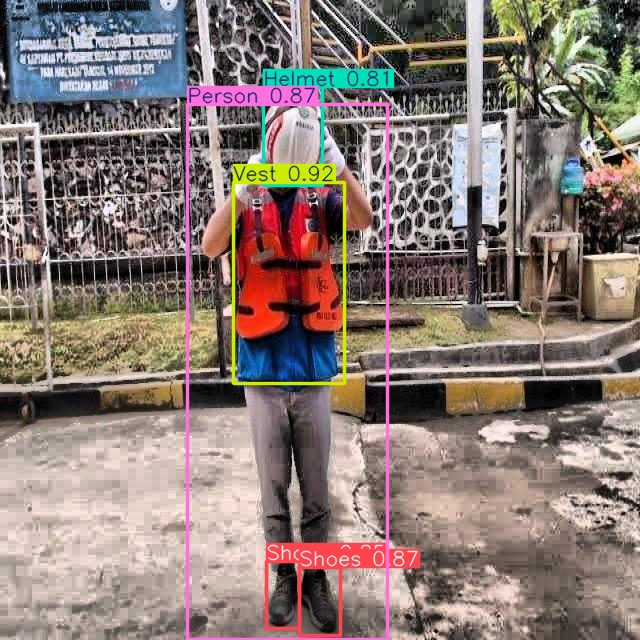

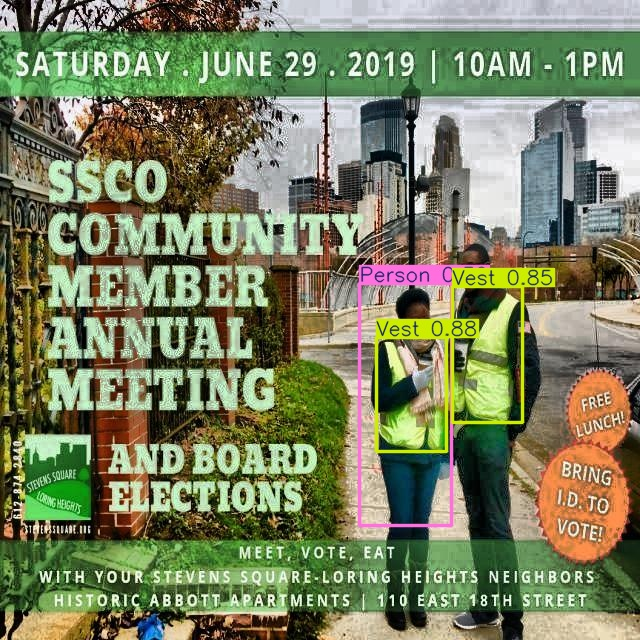

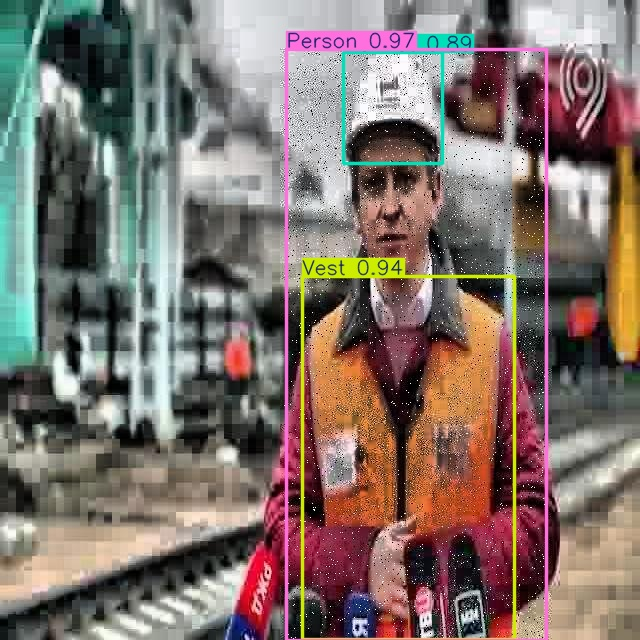

In [17]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")